Josue David Castillo allow_rasterization

Program that analyze product sales from 2019

In [75]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import os
import datetime as dt

In [2]:
path = '/content/drive/MyDrive/Josue/Programas personales phyton/Curso Udemy Data Analytics Real-World Projects in Python/Sales analysis/5-Sales Data Analysis/Sales_Data'

In [3]:
os.listdir('/content/drive/MyDrive/Josue/Programas personales phyton/Curso Udemy Data Analytics Real-World Projects in Python/Sales analysis/5-Sales Data Analysis/Sales_Data')

['Sales_August_2019.csv',
 'Sales_September_2019.csv',
 'Sales_November_2019.csv',
 'Sales_March_2019.csv',
 'Sales_January_2019.csv',
 'Sales_February_2019.csv',
 'Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_May_2019.csv',
 'Sales_June_2019.csv',
 'Sales_July_2019.csv',
 'Sales_October_2019.csv']

In [25]:
files = [file for file in os.listdir(path)]
for file in files:
  print(file)

Sales_August_2019.csv
Sales_September_2019.csv
Sales_November_2019.csv
Sales_March_2019.csv
Sales_January_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_April_2019.csv
Sales_May_2019.csv
Sales_June_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
all_data.csv


In [26]:
#Here need to be careful of existing all_data.csv in the actual directory, to not overread
#in the next block of code i dont replace but if someone try to do it, need to release it

all_data = pd.DataFrame()

for file in files:
	current_df = pd.read_csv(path + "/" +file)
	all_data = pd.concat([all_data, current_df])

all_data.shape

(186850, 7)

In [27]:
all_data.to_csv(path + "/"+"all_data.csv", index=False)

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",NaN
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",NaN
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",NaN
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",NaN
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",NaN


In [29]:
all_data.isnull().sum()

Order ID               545
Product                545
Quantity Ordered       545
Price Each             545
Order Date             545
Purchase Address       545
month               186850
dtype: int64

In [30]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 7)

In [10]:
'04/19/19 08:46'.split('/')[0]

'04'

In [31]:
def month(x):
	return x.split('/')[0]

In [32]:
all_data['month'] = all_data['Order Date'].apply(month)

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [34]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [35]:
all_data['month'].unique()

array(['08', 'Order Date', '09', '10', '11', '12', '03', '04', '01', '02',
       '05', '06', '07'], dtype=object)

In [36]:
filter = all_data['month'] =='Order Date'
all_data = all_data[~filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [37]:
all_data['month'].astype(int)

0         8
1         8
2         8
3         8
4         8
         ..
20374    10
20375    10
20376    10
20377    10
20378    10
Name: month, Length: 185950, dtype: int64

In [39]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [41]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                object
dtype: object

In [42]:
all_data['sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08,7.68


In [44]:
all_data.groupby('month')['sales'].sum()

month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

Text(0, 0.5, 'Sales in USD')

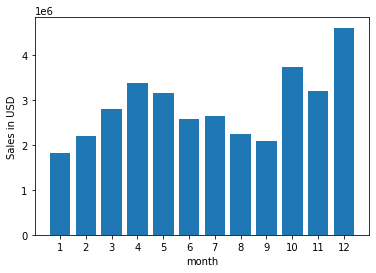

In [47]:
months = range(1,13)
plt.bar(months, all_data.groupby('month')['sales'].sum())
plt.xticks(months)
plt.xlabel('month')
plt.ylabel('Sales in USD')

In [48]:
def city(x):
	return x.split(',')[1]

In [50]:
all_data['city'] = all_data['Purchase Address'].apply(city)

In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00,Portland
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08,7.68,New York City


In [52]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

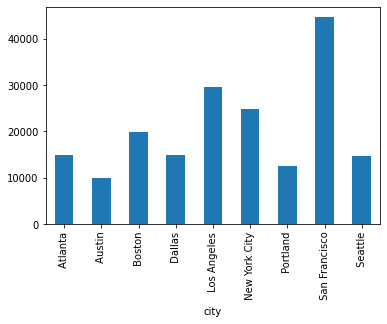

In [53]:
all_data.groupby('city')['city'].count().plot.bar()

In [55]:
all_data['Order Date'].dtype

dtype('O')

In [56]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas,15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00,Portland,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08,7.68,New York City,19


In [58]:
keys = []
hour = []
for key,hour_df in all_data.groupby('Hour'):
	keys.append(key)
	hour.append(len(hour_df))

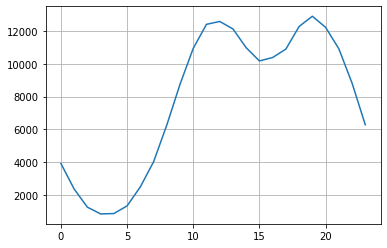

In [59]:
plt.grid()
plt.plot(keys,hour)

In [60]:
all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

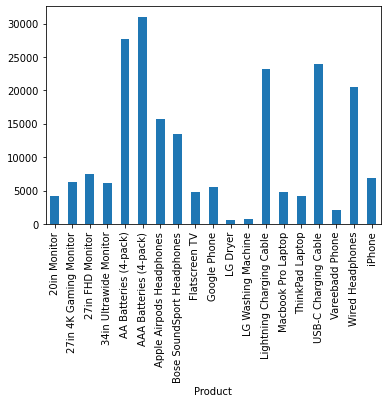

In [61]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [62]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [63]:
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

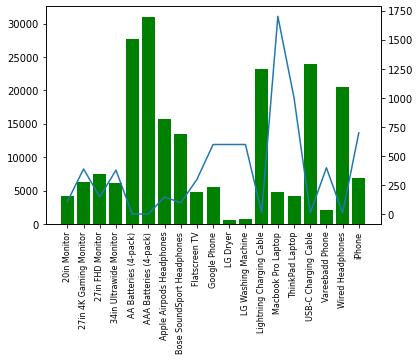

In [66]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices)
ax1.set_xticklabels(products, rotation='vertical', size = 8)

In [69]:
df = all_data['Order ID'].duplicated(keep=False)
df2 = all_data[df]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",08,7.68,San Francisco,20
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",08,11.95,San Francisco,20
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",08,700.00,San Francisco,9
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",08,150.00,San Francisco,9
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",08,600.00,New York City,10


In [70]:
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",08,7.68,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",08,11.95,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",08,700.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",08,150.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",08,600.00,New York City,10,"Google Phone,Wired Headphones"


In [72]:
df2 = df2.drop_duplicates(subset = ['Order ID'])
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Grouped
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",08,7.68,San Francisco,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",08,700.00,San Francisco,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",08,600.00,New York City,10,"Google Phone,Wired Headphones"
132,236799,Google Phone,1,600.00,08/01/19 12:38,"309 2nd St, San Francisco, CA 94016",08,600.00,San Francisco,12,"Google Phone,Wired Headphones"
163,236829,Vareebadd Phone,1,400.00,08/16/19 08:51,"27 2nd St, Los Angeles, CA 90001",08,400.00,Los Angeles,8,"Vareebadd Phone,USB-C Charging Cable"


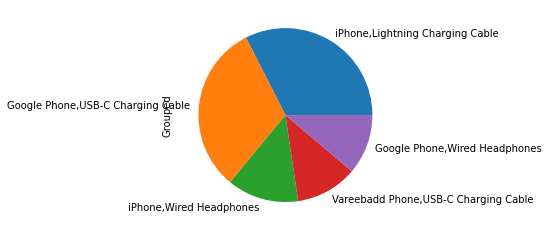

In [73]:
df2['Grouped'].value_counts()[0:5].plot.pie()